In [1]:
#requirements
#pip3 install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/datasets/onemonthprocessed.csv')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  13/05/2024 00:00:00  6.61
1  13/05/2024 00:00:05  6.66
2  13/05/2024 00:00:10  6.66
3  13/05/2024 00:00:15  6.41
4  13/05/2024 00:00:20  6.41
                         ds     y
550069  13/06/2024 23:59:40  2.81
550070  13/06/2024 23:59:45  2.91
550071  13/06/2024 23:59:50  2.91
550072  13/06/2024 23:59:55  2.84
550073  14/06/2024 00:00:00  2.84
                   y
count  550074.000000
mean        4.362149
std         2.275328
min         0.450000
25%         2.240000
50%         4.560000
75%         5.940000
max        11.520000
ds     object
y     float64
dtype: object
550074


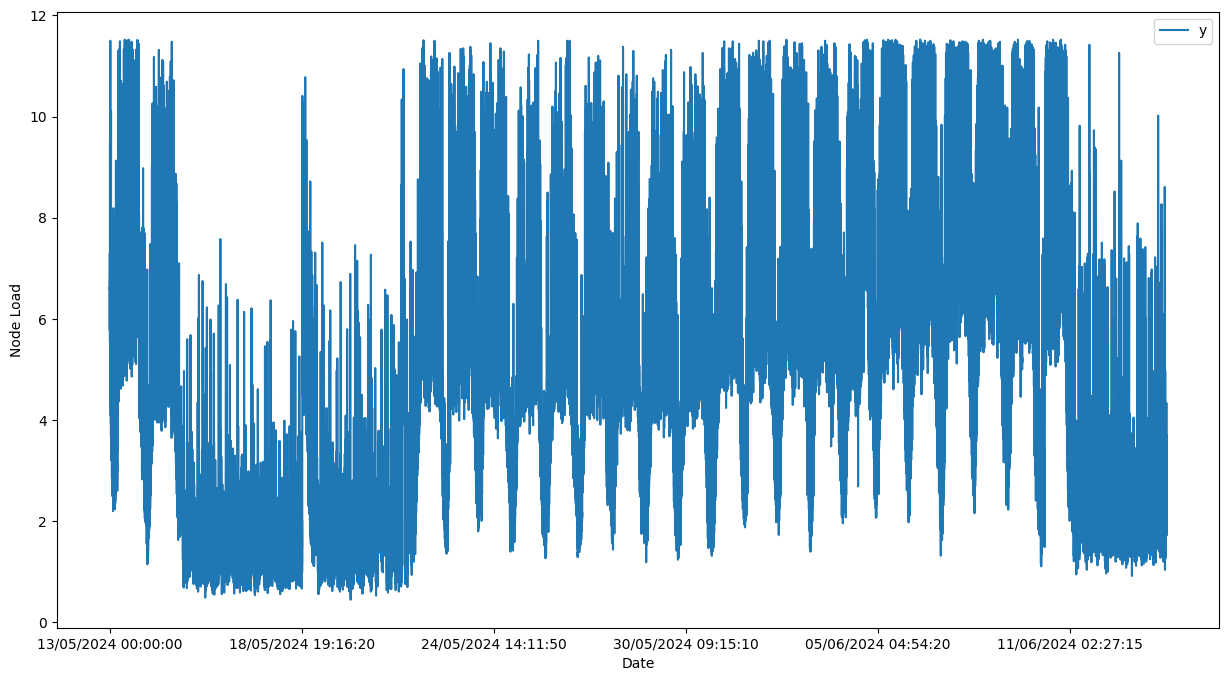

In [16]:
ax = df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Node Load')
ax.set_xlabel('Date')

plt.show()

In [6]:
#Let’s check that if the given dataset is stationary or not, For that we use adfuller.
#from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.852135679223926
p-value: 7.166994935914822e-22


**ARIMA**

**Building an ARIMA Model: A Step-by-Step Guide:**
    
    1. Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.
    2. Model Training: Train the model on your dataset using the fit() method.
    3. Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example order)
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               550074
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -157924.325
Date:                Tue, 09 Jul 2024   AIC                         315854.649
Time:                        23:36:36   BIC                         315888.303
Sample:                             0   HQIC                        315864.139
                             - 550074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007     91.019   8.05e-06      1.000    -178.393     178.395
ma.L1         -0.0007     90.914  -8.14e-06      1.000    -178.188     178.187
sigma2         0.1040    2.5e-05   4151.793      0.0

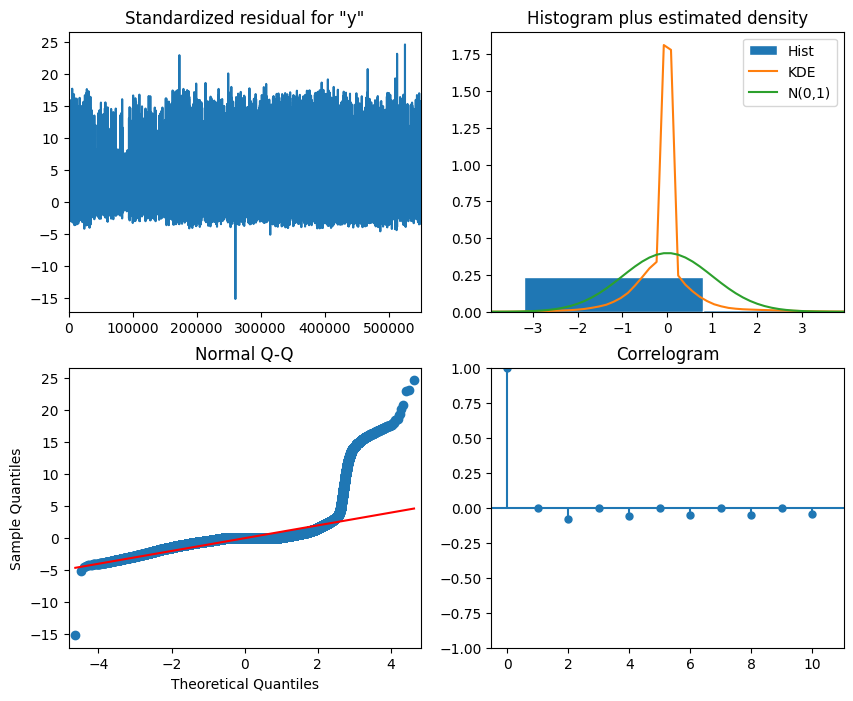

In [8]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

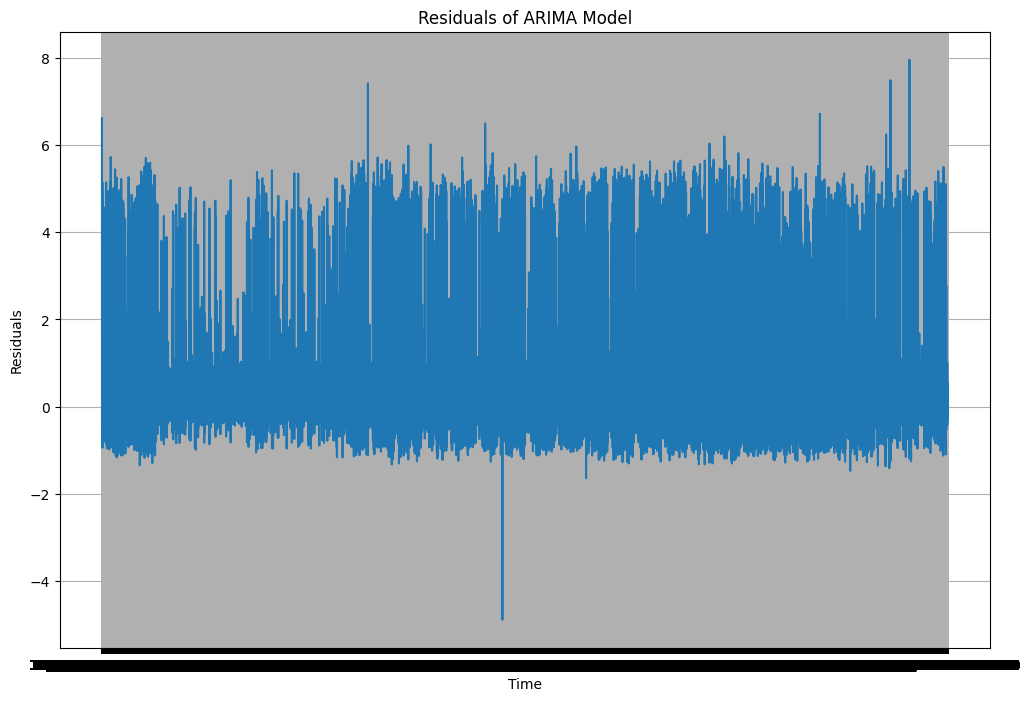

In [10]:
# line plot of residuals
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(12, 8))  # Adjust the figsize as per your preference
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [9]:
forecast_steps = 86400 #5days
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


550074    2.84
550075    2.84
550076    2.84
550077    2.84
550078    2.84
          ... 
636469    2.84
636470    2.84
636471    2.84
636472    2.84
636473    2.84
Name: predicted_mean, Length: 86400, dtype: float64


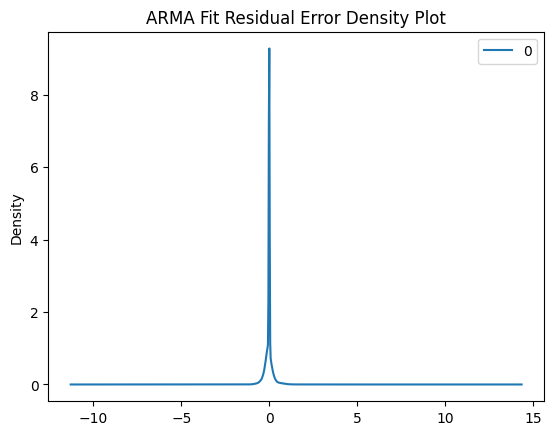

                  0
count  5.500740e+05
mean   5.162890e-06
std    3.225621e-01
min   -4.880000e+00
25%   -4.000000e-02
50%   -6.022478e-07
75%    2.107867e-06
max    7.950000e+00


In [19]:
# density plot of residuals
residuals.plot(kind='kde')
plt.title('ARIMA Fit Residual Error Density Plot')
pyplot.show()
print(residuals.describe())
# summary stats of residuals

In [ ]:
forecast_steps = 24*60*12
forecast = model_fit.get_forecast(steps=forecast_steps)

In [ ]:
# Generate corresponding datetime index for the forecast
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='5s')[1:]

# Create a DataFrame for the forecasted values with datetime index
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
print(forecast.head(5))

In [ ]:
# Plot the original data and the forecast
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['y'], label='Original Data', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('5-Day Forecast')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

**Rolling Forecast ARIMA Model**

How to Forecast with ARIMA:

    Use the predict() function on the ARIMAResults object. This function requires the index of the time steps for which predictions are needed.
    To revert any differencing and return predictions in the original scale, set the typ argument to ‘levels’.
    For a simpler one-step forecast, employ the forecast() function. 

We can split the training dataset into train and test sets, use the train set to fit the model and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

In [23]:
#When dealing with time series data, a rolling forecast is often necessary due to the dependence on prior observations. One way to do this is to re-create the model after each new observation is received. 

#To keep track of all observations, we can manually maintain a list called history, which initially contains training data and to which new observations are appended each iteration. This approach can help us get an accurate forecasting model.